# HomeWork06

### **2.3.1.** Загрузка данных и первичный анализ

#### **1** Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.inspection import permutation_importance

#### **2** Загрузка датасета и вывод информации

In [2]:
df = pd.read_csv('S06-hw-dataset-01.csv')

#### **3** Анализ датасета

In [3]:
print("Первые 5 строк данных")
print(df.head())

print("\nИнформация о датафрейме")
print(df.info())

print("\nБазовые статистики")
print(df.describe(include='all'))

Первые 5 строк данных
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_r

#### **4** Распределение таргета

In [4]:
print("\nРаспределение целевой переменной (target):")
target_counts = df['target'].value_counts()
target_ratios = df['target'].value_counts(normalize=True)
print(target_counts)
print("\nДоли классов:")
print(target_ratios)

# Проверка пропусков
print("\nКоличество пропущенных значений по столбцам")
print(df.isnull().sum())

# Типы данных
print("\nТипы данных столбцов")
print(df.dtypes)

# Разделение на признаки (X) и (y)
feature_columns = [col for col in df.columns if col not in ['id', 'target']]
X = df[feature_columns]
y = df['target']

print(f"\nФорма X: {X.shape}")
print(f"Форма y: {y.shape}")
print(f"Признаки: {list(X.columns)}")


Распределение целевой переменной (target):
target
0    8119
1    3881
Name: count, dtype: int64

Доли классов:
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

Количество пропущенных значений по столбцам
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

Типы данных столбцов
id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            flo

### **2.3.2.** Train/Test-сплит и воспроизводимость

#### **1** Разделение данных на train/test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nРазмер выборки (обучающей): {X_train.shape[0]}")
print(f"Размер выборки (тестовой): {X_test.shape[0]}")

# Проверка (распределения классов)
print("\nРаспределение классов в выборке (обучающей):")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в выборке (тестовой):")
print(y_test.value_counts(normalize=True))


Размер выборки (обучающей): 9600
Размер выборки (тестовой): 2400

Распределение классов в выборке (обучающей):
target
0    0.676562
1    0.323437
Name: proportion, dtype: float64

Распределение классов в выборке (тестовой):
target
0    0.676667
1    0.323333
Name: proportion, dtype: float64


#### **4** Пояснение почему фиксированный seed и стратификация важны.

**Фиксированный `seed`** (random_state) обеспечивает воспроизводимость результатов. Без него при каждом запуске кода данные будут делиться по-разному, что сделает сравнение моделей некорректным из этого нельзя будет понять, улучшилась ли модель или просто повезло с разбиением.

**Стратификация** (stratify=y) сохраняет баланс классов при разделении. Особенно важно при дисбалансе. Если один класс редкий, то случайное разделение может потерять его в тестовой выборке, что приведёт к нереалистичным метрикам качества.

### **2.3.3.** Baseline’ы

#### **1** DummyClassifier

In [6]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

#### **2** LogisticRegression

In [7]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
logreg_pipe.fit(X_train, y_train)
y_pred_logreg = logreg_pipe.predict(X_test)

#### **3** Выводы DummyClassifier и LogisticRegression

In [8]:
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nПодробный отчёт:")
    print(classification_report(y_true, y_pred))

print_metrics(y_test, y_pred_dummy, "DummyClassifier")
print_metrics(y_test, y_pred_logreg, "LogisticRegression")


DummyClassifier
Accuracy: 0.6767
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Подробный отчёт:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1624
           1       0.00      0.00      0.00       776

    accuracy                           0.68      2400
   macro avg       0.34      0.50      0.40      2400
weighted avg       0.46      0.68      0.55      2400


LogisticRegression
Accuracy: 0.8275
Precision: 0.7828
Recall: 0.6456
F1-score: 0.7076

Подробный отчёт:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1624
           1       0.78      0.65      0.71       776

    accuracy                           0.83      2400
   macro avg       0.81      0.78      0.79      2400
weighted avg       0.82      0.83      0.82      2400



c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

#### **4** Пояснение

**`DummyClassifier`** даёт только ~ 70% точности, предсказывая лишь доминирующий класс. Для миноритарного класса метрики нулевые то есть модель его полностью игнорирует.

**`LogisticRegression`** показывает ~ 83% точности и сбалансированно работает с обоими классами. F1-score для редкого класса достигает ~ 0.70, что означает реальную способность модели распознавать важные, но менее частые случаи.

### **2.3.4.** Модели недели 6 

In [9]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.02]
}
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_cv.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'min_samples_leaf': [1, 2]
}
gb_cv = GridSearchCV(gb, gb_params, cv=5, scoring='f1', n_jobs=-1)
gb_cv.fit(X_train, y_train)


# Сохранение GridSearchCV для извлечения метаданных
grid_searches = {
    'DecisionTree': dt_cv,
    'RandomForest': rf_cv,
    'GradientBoosting': gb_cv
}

# Сохранение лучших моделей
models = {
    'DummyClassifier': dummy_clf,
    'LogisticRegression': logreg_pipe,
    'DecisionTree': dt_cv.best_estimator_,
    'RandomForest': rf_cv.best_estimator_,
    'GradientBoosting': gb_cv.best_estimator_
}

# Stacking 
stack = StackingClassifier(
    estimators=[
        ('dt', dt_cv.best_estimator_),
        ('rf', rf_cv.best_estimator_),
        ('gb', gb_cv.best_estimator_)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stack.fit(X_train, y_train)
models['Stacking'] = stack

### **2.3.5.** Метрики качества и **2.3.6.** Интерпретация


F1-score на тестовой выборке
DummyClassifier     : 0.0000
LogisticRegression  : 0.7076
DecisionTree        : 0.7924
RandomForest        : 0.8792
GradientBoosting    : 0.8868
Stacking            : 0.8936

Лучшая модель по F1: Stacking (0.8936)

Подробный отчёт: Stacking
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1624
           1       0.91      0.88      0.89       776

    accuracy                           0.93      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.93      0.93      2400


Метрики на тестовой выборке:
DummyClassifier      | Acc: 0.6767, F1: 0.0000, ROC-AUC: 0.5000
LogisticRegression   | Acc: 0.8275, F1: 0.7076, ROC-AUC: 0.8747
DecisionTree         | Acc: 0.8721, F1: 0.7924, ROC-AUC: 0.8950
RandomForest         | Acc: 0.9258, F1: 0.8792, ROC-AUC: 0.9666
GradientBoosting     | Acc: 0.9292, F1: 0.8868, ROC-AUC: 0.9689
Stacking             | Acc: 0.9325, F1: 0.8936, ROC-

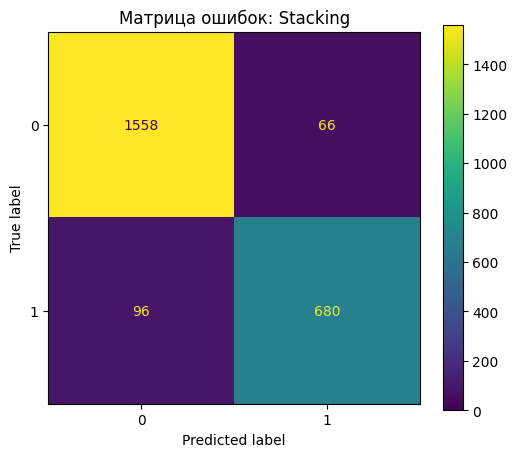

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_plotting.py:176: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


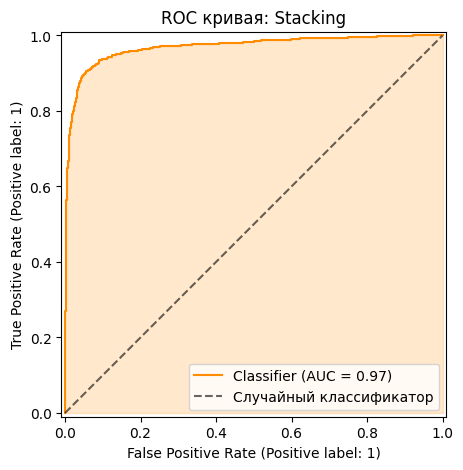

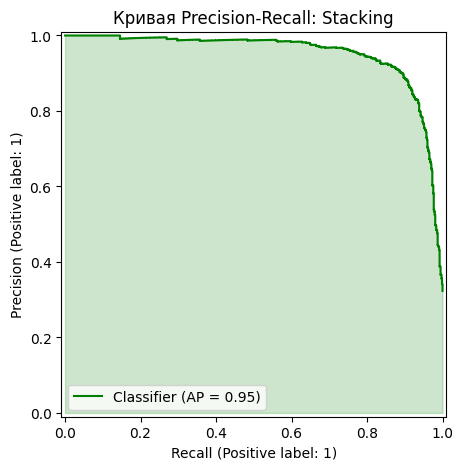


Вычисление Permutation Importance для Stacking.

Top-10 важнейших признаков:
 1. num19                | 0.1040 ± 0.0056
 2. num18                | 0.0914 ± 0.0056
 3. num07                | 0.0569 ± 0.0026
 4. num04                | 0.0272 ± 0.0022
 5. num24                | 0.0164 ± 0.0031
 6. num01                | 0.0140 ± 0.0018
 7. num21                | 0.0127 ± 0.0018
 8. num20                | 0.0112 ± 0.0033
 9. num14                | 0.0107 ± 0.0020
10. num22                | 0.0106 ± 0.0022


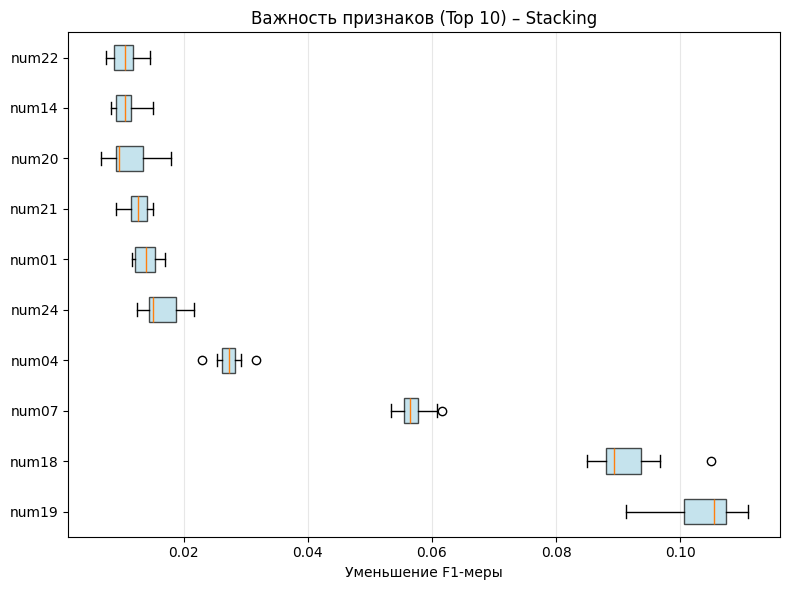

In [ ]:
# Оценка F1
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = f1_score(y_test, y_pred)

print("\nF1-score на тестовой выборке")
for name, f1 in results.items():
    print(f"{name:20}: {f1:.4f}")

# Лучшая модель по F1
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nЛучшая модель по F1: {best_model_name} ({results[best_model_name]:.4f})")

# Отчёт по лучшей модели
y_pred_best = best_model.predict(X_test)
print(f"\nПодробный отчёт: {best_model_name}")
print(classification_report(y_test, y_pred_best))

# Сборка всех метрик
all_metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except (AttributeError, NotImplementedError):
        auc = None

    all_metrics[name] = {
        'accuracy': float(acc),
        'f1': float(f1),
        'roc_auc': float(auc) if auc is not None else None
    }

# Метрики
print("\nМетрики на тестовой выборке:")
for name, m in all_metrics.items():
    roc_str = f"{m['roc_auc']:.4f}" if m['roc_auc'] is not None else "N/A"
    print(f"{name:20} | Acc: {m['accuracy']:.4f}, F1: {m['f1']:.4f}, ROC-AUC: {roc_str}")


# Графики
fig, ax = plt.subplots(figsize=(6, 5))
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, ax=ax, cmap='viridis')
cm_display.im_.set_clim(0, np.max(cm_display.confusion_matrix))
plt.title(f'Матрица ошибок: {best_model_name}')
plt.grid(False)
plt.savefig('artifacts/figures/confus_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# ROC Curve
try:
    y_proba_best = best_model.predict_proba(X_test)[:, 1]
    fig, ax = plt.subplots(figsize=(6, 5))
    roc_display = RocCurveDisplay.from_predictions(y_test, y_proba_best, ax=ax, color='darkorange')
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Случайный классификатор')
    ax.fill_between(roc_display.fpr, roc_display.tpr, alpha=0.2, color='darkorange')
    ax.set_title(f'ROC кривая: {best_model_name}')
    ax.legend(loc='lower right')
    plt.savefig('artifacts/figures/roc_curve.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
except Exception as e:
    print(f"ROC не построен для {best_model_name}: {e}")

# Precision-Recall Curve
try:
    fig, ax = plt.subplots(figsize=(6, 5))
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_proba_best, ax=ax, color='green')
    ax.fill_between(pr_display.recall, pr_display.precision, alpha=0.2, color='green')
    ax.set_title(f'Кривая Precision-Recall: {best_model_name}')
    plt.savefig('artifacts/figures/pr_curve.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
except Exception as e:
    print(f"PR-curve не построен: {e}")


# Permutation Importance
print(f"\nВычисление Permutation Importance для {best_model_name}.")
perm_imp = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

indices = np.argsort(perm_imp.importances_mean)[::-1]
top_n = min(10, len(feature_columns))

print(f"\nTop-{top_n} важнейших признаков:")
for i in range(top_n):
    idx = indices[i]
    print(f"{i+1:2}. {feature_columns[idx]:20} | {perm_imp.importances_mean[idx]:.4f} ± {perm_imp.importances_std[idx]:.4f}")

# График важности
fig, ax = plt.subplots(figsize=(8, 6))
boxplot_data = [perm_imp.importances[indices[i]] for i in range(top_n)]
feature_labels = [feature_columns[indices[i]] for i in range(top_n)]

positions = range(top_n)
box = ax.boxplot(boxplot_data, vert=False, positions=positions, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_yticks(positions)
ax.set_yticklabels(feature_labels)
ax.set_xlabel('Уменьшение F1-меры')
ax.set_title(f'Важность признаков (Top {top_n}) – {best_model_name}')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/figures/permutat_import.png', dpi=150)
plt.show()
plt.close()

### **2.4.** Артефакты эксперимента

In [14]:
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

# Результаты поиска гиперпараметров
search_summaries = {}
for name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
    gs = grid_searches[name]
    search_summaries[name] = {
        'best_params': gs.best_params_,
        'best_cv_score': float(gs.best_score_)
    }

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4)

# Лучшая модель
joblib.dump(best_model, 'artifacts/best_model.joblib')

# Метаданные лучшей модели
best_meta = {
    'model_name': best_model_name,
    'model_class': type(best_model).__name__,
    'parameters': best_model.get_params(),
    'test_metrics': all_metrics[best_model_name]
}

with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_meta, f, indent=4, default=str)

print("\nУспех")


Успех
